## 실습2. 유사도 이용한 추천

#### 예제 데이터: Kaggle Movies meta dataset

- 24개 컬럼을 가진 45,466개 샘플로 구성된 영화 정보 데이터 
- 데이터파일 : movies_metadata.csv
- 출처 : https://www.kaggle.com/rounakbanik/the-movies-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#### 1. 데이터 준비

- 예제 데이터 파일 다운로드 및 압축해제

#### 2. 데이터 프레임으로 변환

In [2]:
movies = pd.read_csv('data/MovieDataset/movies_metadata.csv',low_memory=False)
movies.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
movies.budget.nunique()

1226

#### 3. 데이터 정제

- overview컬럼 : 영화 리뷰

In [5]:
movies.overview.isna().sum()

954

- overview컬럼 결측치를 ''값으로 대체

In [6]:
movies['overview'] = movies.overview.fillna('')
movies.overview.isna().sum()

0

#### 4. TF-IDF 피처벡터화

- overview 컬럼을 TF-IDF의 stop_words를 사용하여 불용어 제거 및 벡터화 수행

In [8]:
tfidf_v = TfidfVectorizer(stop_words='english')
ftr_v = tfidf_v.fit_transform(movies.overview)
print(f'TF-IDF 행렬의 크기:',ftr_v.shape)

TF-IDF 행렬의 크기: (45466, 75827)


#### 5. 코사인 유사도
- overview 컬럼의 기준으로 각 문서의 코사인 유사도 계산

In [98]:
cos_sim = cosine_similarity(ftr_v, ftr_v)

MemoryError: Unable to allocate 15.4 GiB for an array with shape (45466, 45466) and data type float64

In [22]:
print(f'코사인 유사도 행렬의 크기:',cos_sim.shape)

코사인 유사도 행렬의 크기: (45466, 45466)


#### 6. 영화 제목과 인덱스를 갖는 딕셔너리 생성

In [9]:
movies['title']

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45461                         Subdue
45462            Century of Birthing
45463                       Betrayal
45464               Satan Triumphant
45465                       Queerama
Name: title, Length: 45466, dtype: object

In [11]:
title_to_index = dict(zip(movies['title'], movies.index))
title_to_index['Father of the Bride Part II']

4

#### 7. 선택한 영화 제목의 overview와 가장 유사한 overview 10개 영화 찾기

In [17]:
title = 'Father of the Bride Part II'
idx = title_to_index[title]
print(idx)
sim_scores = list(enumerate(cos_sim[idx]))
sim_scores10 = sorted(sim_scores, key=lambda x:x[1], reverse=True)[1:11]
indices = [item[0] for item in sim_scores10]
movies.title.iloc[indices]

4


6793        Father of the Bride
6571                      Kuffs
6306            North to Alaska
19801                   Babbitt
34466         You're Killing Me
13611       The Magic of Méliès
5005                    Wendigo
27974          I Start Counting
43887    George of the Jungle 2
7097         The Out of Towners
Name: title, dtype: object

In [83]:
def recommend_movie(title, cos_sim, n=10):
    idx = title_to_index[title]
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores_top = sorted(sim_scores, key=lambda x:x[1], reverse=True)[1:n+1]
    indices = [item[0] for item in sim_scores_top]
    return movies.title.iloc[indices]

In [86]:
title = 'Kuffs'
recommend_movie(title, cos_sim)

4        Father of the Bride Part II
6306                 North to Alaska
34466              You're Killing Me
13740                     Trojan War
19801                        Babbitt
13611            The Magic of Méliès
7097              The Out of Towners
5005                         Wendigo
27974               I Start Counting
24041                    To Be Takei
Name: title, dtype: object

In [23]:
movies.iloc[recommend_movie(title, cos_sim).index]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
6306,False,NaN,3500000,"[{'id': 37, 'name': 'Western'}]",NaN,6523,tt0054127,en,North to Alaska,Sam and George strike gold in Alaska. George s...,...,1960-11-07,0.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"These were the adventures . . . fighting, laug...",North to Alaska,False,5.7,25.0
34466,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,348929,tt4490654,en,You're Killing Me,"Joe just told his boyfriend, George, that he i...",...,2015-07-15,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,George has a killer new boyfriend.,You're Killing Me,False,6.0,2.0
13740,False,NaN,15000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,14330,tt0120376,en,Trojan War,Brad is about to hook up with the girl of his ...,...,1997-09-26,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,She has 24 hours to convince the guy of her dr...,Trojan War,False,5.4,25.0
19801,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,137429,tt0024851,en,Babbitt,Middle aged George F. Babbitt is a leading cit...,...,1934-12-08,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Babbitt,False,0.0,0.0
13611,False,NaN,0,[],NaN,91603,tt0318413,en,La magie Méliès,A documentary about George Méliès.,...,1997-01-01,0.0,131.0,[],Released,NaN,The Magic of Méliès,False,7.5,2.0
7097,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,20444,tt0066193,en,The Out of Towners,George &amp; Gwen Kellerman make a trip to New...,...,1970-05-28,0.0,98.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,"When they take you for an out-of-towner, they ...",The Out of Towners,False,7.1,24.0
5005,False,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,44340,tt0275067,en,Wendigo,George is a high-strung professional photograp...,...,2001-01-23,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Wendigo,False,5.0,22.0
27974,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}]",NaN,96243,tt0064462,en,I Start Counting,"Jenny Agutter plays Wynne, an adopted 14-year-...",...,1970-10-27,0.0,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"In the world of the nightmare, a little blood ...",I Start Counting,False,5.3,5.0
24041,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",http://tobetakei.com/,250777,tt2174896,en,To Be Takei,"Over seven decades, actor and activist George ...",...,2014-08-22,0.0,94.0,[],Released,"A star’s trek for life, liberty, and love.",To Be Takei,False,6.9,25.0


#### 8. 선택한 영화와 유사도가 높은 상위 10개 영화와의 코사인 유사도 시각화

#### 히트맵(heatmap)

1
Index([21633, 45253, 41573, 35509, 44376, 17223, 8801, 6166, 30981, 9503], dtype='int64')


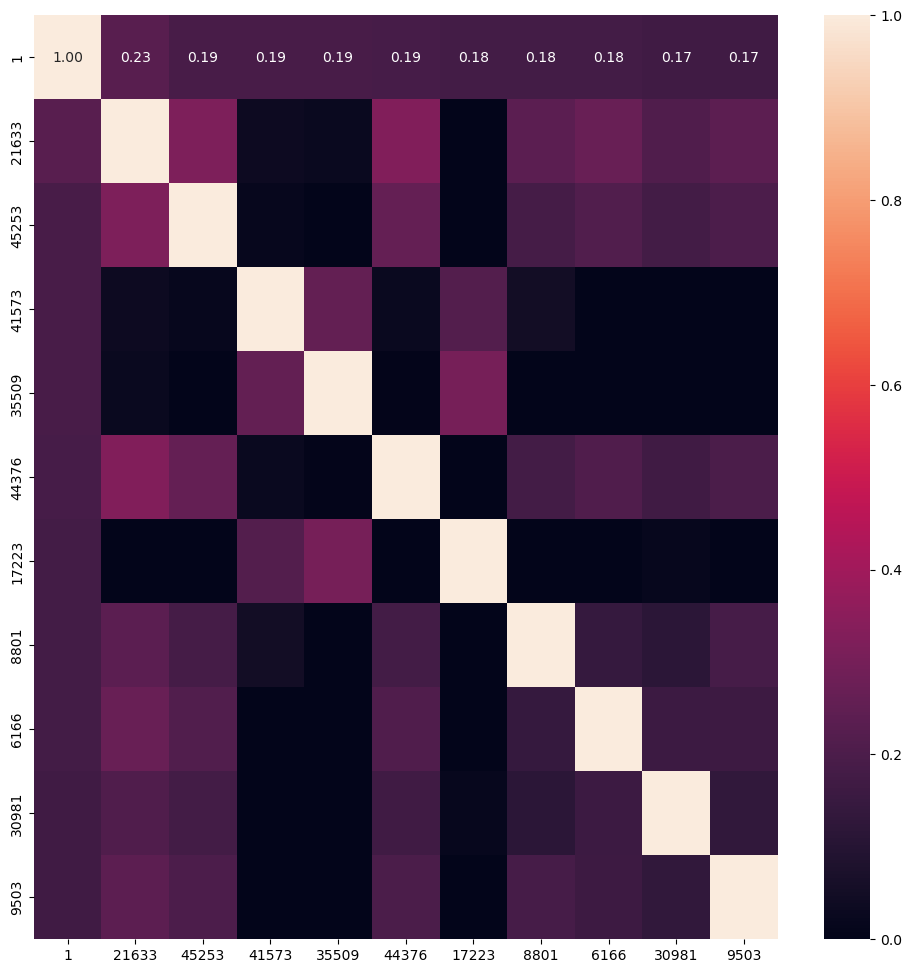

In [89]:
title = 'Jumanji'
my_idx = title_to_index[title]
print(my_idx)
top10_idx = recommend_movie(title, cos_sim).index
print(top10_idx)

mv_idx = [my_idx] + list(top10_idx)
cos_sim_10 = cosine_similarity(ftr_v[mv_idx], ftr_v[mv_idx])
cos_sim_10

plt.figure(figsize=(12,12))
sns.heatmap(cos_sim_10, annot=True, fmt='.2f', xticklabels=mv_idx,
           yticklabels=mv_idx)
plt.show()

- 사인 유사도가 큰 순으로 movie_index를 재정렬

In [91]:
cos_sim_10[0]

array([1.        , 0.22806347, 0.19132692, 0.18912467, 0.18884059,
       0.18711871, 0.17943949, 0.17790469, 0.17716921, 0.17118011,
       0.1693555 ])

#### barplot

In [105]:
title = 'The Dark Knight Rises'
n = 10
mv_info = recommend_movie(title, cos_sim, n)
mv_title = mv_info.values
mv_idx = mv_info.index
cos_sim_10 = cosine_similarity(ftr_v[mv_idx], ftr_v[mv_idx])
sim = cos_sim_10[0][1:]
df_title = pd.DataFrame(sim, index=mv_title[1:], columns=['similarity'])
df_title

IndexError: index 18252 is out of bounds for axis 0 with size 11

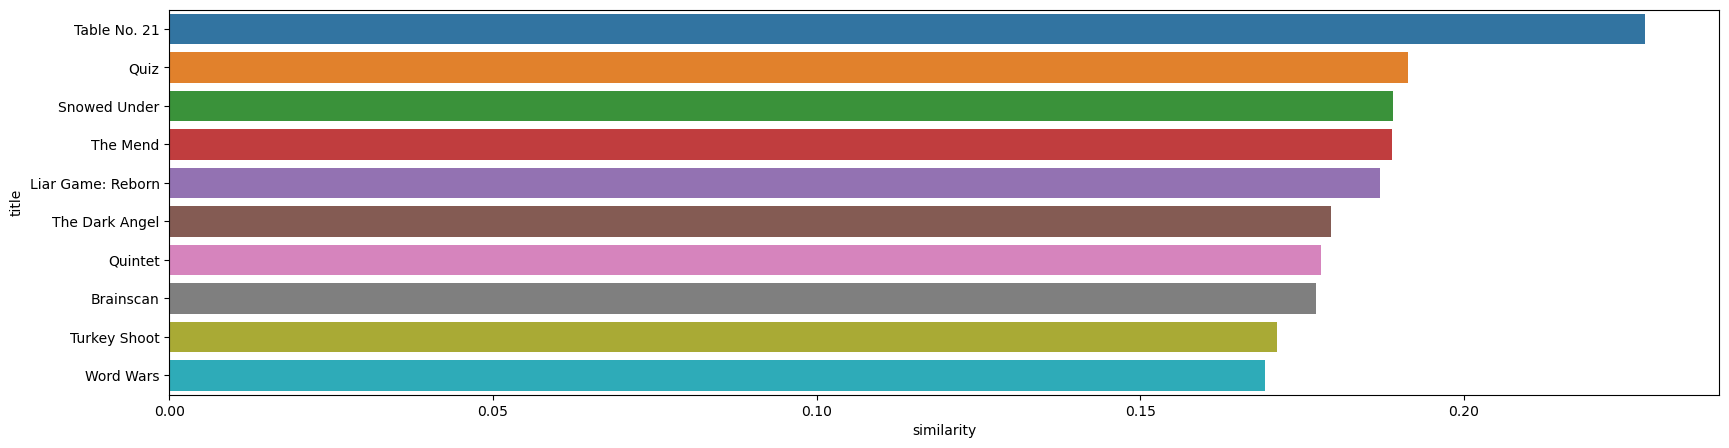

In [101]:
plt.figure(figsize=(20,5))
sns.barplot(df_title, x='similarity',y=df_title.index)
plt.show()

=> The Dark Knight Rises와 리뷰와 가장 유사도가 큰 영화는 The Dark Knight(0.32667)

------------